# Mecanismos

<img src="https://github.com/ccdonoso/Intro2_Computational_Mechanics/blob/master/img/logo_usach_dimec.png?raw=true" alt="logo" width="300"/>

- Autor: Claudio Canales Donoso
- Página: [ccdonoso.github.io](https://ccdonoso.github.io/)
- Cursos: Mecánica Computacional - Diseño Computarizado
- Universidad de Santiago de Chile
- Fecha: 05/03/24

License: BSD 3 clause

**Contenido** 
- Repaso Mecánismos
- Métodos Numéricos y Mecanismos


## Repaso Mecanismos

### Grados de libertad para mecanismos planos:

$$N_{gl} = 3(n-1) -2P_1 -P_2$$

Donde:

- $N_{gl}$: grados de libertad
- $n$: Número de barras
- $P_1$: Pares de un mov. relativo
- $P_2$: Pares de dos mov. relativo

### Tipos de coordenadas:

**Coordenadas Independientes**: Estas coordenadas coinciden con el número de grados
de libertad de la cinemática de un mecanismo. Es decir, es la cantidad mínima
de coordenadas para representar la cinemática del mecanismo.
<img src="img/cord_indep.png" alt="logo" width="400"/>


**Coordenadas Dependientes**: Describen la cinemática del mecanismo con una
cantidad mayor de coordenadas que los grados de libertad del sistema. Esto
facilita la descripción de un mecanismo o un sistema “Multibody”. Pero es
necesario considerar la dependencia de las variables a través de restricciones.
El número de restricciones es :

**Restricciones = Coordenadas dependientes - grados de libertad.**

<img src="img/cord_relativas.png" alt="logo" width="350"/>


### Restricciones:

#### Cuerpo rígido:
<img src="img/cuerpo_rigido.png" alt="logo" width="100"/>
$$ (x_2-x_1)^2 + (y_2-y_1)^2 -L_{12}^2=0$$

#### Cuerpo rígido 3 puntos:
<img src="img/cuerpo_rigido3.png" alt="logo" width="100"/>
$$ (x_2-x_1)^2 + (y_2-y_1)^2 -L_{12}^2=0$$
$$ (x_3-x_1)^2 + (y_3-y_1)^2 -L_{13}^2=0$$
$$ (x_3-x_2)^2 + (y_3-y_2)^2 -L_{23}^2=0$$

#### Cuerpo rígido 3 puntos alineados:
<img src="img/cuerpo_rigido_alineado.png" alt="logo" width="100"/>
$$ (x_2-x_1)^2 + (y_2-y_1)^2 -L_{12}^2=0$$
$$(x_3-x_1)-\frac{L_{13}}{L_{12}}(x_2-x_1) = 0 $$
$$(y_3-y_1)-\frac{L_{13}}{L_{12}}(y_2-y_1) = 0 $$

#### Par prismático:
<img src="img/restriccion_par_prismatico.png" alt="logo" width="150"/>
$$(x_2-x_1)(y_3-y_1) - (y_2-y_1)(x_3-x_1) = 0$$

#### Restricción de ángulo:
<img src="img/restriccion_angulo.png" alt="logo" width="150"/>
$$(x_1-x_2)(x_3-x_2)+(y_1-y_2)(y_3-y_2)-L_{12}L_{23}cos(\phi) = 0$$
$$(x_1-x_2)(y_3-y_2)+(y_1-y_2)(x_3-x_2)-L_{12}L_{23}sin(\phi) = 0$$

#### Restricción de distancia:
<img src="img/restricción_distancia.png" alt="logo" width="100"/>
$$(x_3-x_1)-\frac{s}{L_{12}}(x_2-x_1)=0 $$
$$(y_3-y_1)-\frac{s}{L_{12}}(y_2-y_1)=0 $$

#### Ejemplo de restricciones en mecanismo :
<img src="img/ejemplo_restricciones.png" alt="logo" width="700"/>

## Problema Resuelto:

 **Problema**: Se pide desarrollar un programa en Python que permita resolver el problema cinemático de posición para el mecanismo plano de la figura. Para ello debe utilizar el método de coordenadas naturales visto en clases. Considere que el ángulo $\phi_1$ varía a una razón de cambio constante. Se pide: 
 
 - Calcular la posición del punto dos en el tiempo y graficarla
 - Determine los máximos valores de $\phi_1$ y $\phi_2$.
 - ¿Qué ocurre si $\phi_1 = 0$ y $\phi_2 = 0$, simultáneamente?.
 - Valide los resultados anteriores con algún método analítico.

<img src="img/mecanismos.svg" alt="logo" width="600"/>

**Restricciones**

$$ (x_2 - x_1)^2 + (y_2-y_1)^2 - (s)^2 = 0 $$
$$ (x_2 - x_B)^2 + (y_2-y_B)^2 - (2s)^2 = 0 $$

$$ s = 1 [m] $$

$$ x_A=(0,0) \quad x_B = (3,0) $$

En base a $x_1$  calcular las otras posiciones

### Solución

Para resolver el sistema de ecuaciones no-lineales se utilizara el método de Newton. Para ellos es necesario resolver

$$\mathbf{x}_{k+1} = \mathbf{x}_{k} - \mathbf{J}(\mathbf{x}_k)^{-1} \mathbf{F}(\mathbf{x}_k) \quad ,  $$

donde, $- \mathbf{J}(\mathbf{x}_k)^{-1} \mathbf{F}(\mathbf{x}_k) = \Delta \mathbf{x}_k $ se puede calcular al resolver el siguiente sistema de ecuaciones:

$$\mathbf{J}(\mathbf{x}_k) \Delta \mathbf{x}_k = - \mathbf{F}(\mathbf{x}_k)  \quad .$$

**Recordar que estos problemas pueden tener múltiples soluciones y están condicionados por la inicialización**

#### Solución 1

<img src="img/mec.gif" alt="logo" width="600"/>

#### Solución 2

<img src="img/mec1.gif" alt="logo" width="600"/>


**1.- Para ello cree una función que permita calcular el vector de funciones:**

In [180]:
def vect_mec(x):
    """
    x = [x1,y1,x2,y2]
    Paramétros
    ----------
    x: ndarray
        Vector de variables
    Retorno
    ----------
    F: ndarray
        Vector de funciones
        """
    F = np.zeros(2)
    
    # Para ejemplificar como programar el método, se  representara cada variable como escalar
    
    x1,y1,x2,y2 = x
    
    F[0] = (x2-x1)**2. + (y2-y1)**2.- 1.
    
    F[1] = (x2-3.)**2. + (y2)**2 - 4.
    
    return F

**2.- Crear una función para calcular el Jacobiano.**

In [66]:
def jacob_mec(x):
    """
    x = [x1,y1,x2,y2]
    Paramétros
    ----------
    x: ndarray
        Vector de variables
    Retorno
    ----------
    J: ndarray
        Matriz Jacobiana J(y1,x2,y2) 
        """
    
    # Para ejemplificar como programar el método, se  representara cada variable como escalar
    
    x1,y1,x2,y2 = x
    
    #                  dx2           dy2
    J = np.array( [[ 2*(x2-x1) , 2*(y2-y1)],
                   [ 2*(x2-3.)  ,  2.*y2  ]])

    return J

**3.- Calcular la posición del mecanismos para diferentes ángulos de $\phi_1$**

No tiene solución en: 70.66442330705532


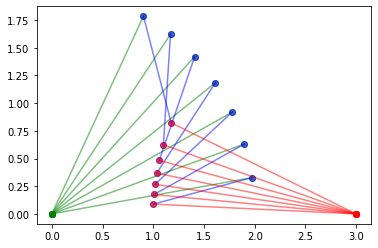

In [177]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML
import matplotlib.animation

angulos = np.linspace(0.01,np.pi/2.,1000) # [0,90º]

x = np.array([0,0,0.1,0.01])

k = 0 

nodos = np.zeros((4,2))
nodos[3,:] = [3.,0.]

sol = []

for fi_1 in angulos:
    
    x[0] = 2. * np.cos(fi_1)
    x[1] = 2. * np.sin(fi_1)
    
    for i in range(100): #hacer con tolerancia y while
        F = vect_mec(x)
        J = jacob_mec(x)
        dx = np.linalg.solve(J,-F)
        x[2:] = x[2:] + dx
    
    if np.dot(dx,dx)>0.01:
        print("No tiene solución en:",fi_1*180./np.pi)
        break
    
    nodos[1:3,:] = x.reshape((2,2))
    sol.append(nodos.copy())
    
    k = k + 1
    if k % 100 == 0:
        plt.plot(nodos[0:2,0],nodos[0:2,1],'go-',alpha=0.5)
        plt.plot(nodos[1:3,0],nodos[1:3,1],'bo-',alpha=0.5)
        plt.plot(nodos[2:,0],nodos[2:,1],'ro-',alpha=0.5)

In [178]:
# Setup Gráficos
fig, ax = plt.subplots(figsize=(8,6))
ax.axis([0,4,0,4])
l, = ax.plot([],[],'bo-')

sol = np.array(sol)

def animate(i):
    l.set_data(sol[i,:,0],sol[i,:,1])
    return l

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=range(0,sol.shape[0],12))
ani.save('mec.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
plt.close()
HTML(ani.to_jshtml())

No tiene solución en: 70.75393986581895


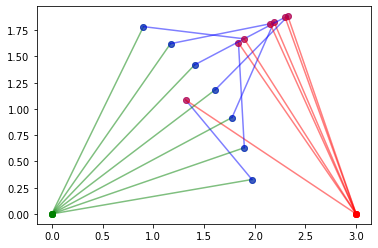

In [181]:
angulos = np.linspace(0.01,np.pi/2.,1000) # [0,90º]

x = np.array([0,0,10.,-0.11])

k = 0 

nodos = np.zeros((4,2))
nodos[3,:] = [3.,0.]

sol = []

for fi_1 in angulos:
    
    x[0] = 2. * np.cos(fi_1)
    x[1] = 2. * np.sin(fi_1)
    for i in range(100): #hacer con tolerancia y while
        F = vect_mec(x)
        J = jacob_mec(x)
        dx = np.linalg.solve(J,-F)
        x[2:] = x[2:] + dx
    
    if np.dot(dx,dx)>0.01:
        print("No tiene solución en:",fi_1*180./np.pi)
        break
        
    nodos[1:3,:] = x.reshape((2,2))
    sol.append(nodos.copy())
    
    k = k + 1
    if k % 100 == 0:
        plt.plot(nodos[0:2,0],nodos[0:2,1],'bo-',alpha=0.5)
        plt.plot(nodos[1:3,0],nodos[1:3,1],'bo-',alpha=0.5)
        plt.plot(nodos[2:,0],nodos[2:,1],'bo-',alpha=0.5)

In [ ]:
# Setup Gráficos
fig, ax = plt.subplots(figsize=(8,6))
ax.axis([0,4,0,4])
l, = ax.plot([],[],'ro-')
sol = np.array(sol)

def animate(i):
    l.set_data(sol[i,:,0],sol[i,:,1])
    return l

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=range(0,sol.shape[0],12))
plt.close()
HTML(ani.to_jshtml())

## Referencias:

[1] De Jalon, J. G., & Bayo, E. (2012). Kinematic and dynamic simulation of multibody systems:
the real-time challenge. Springer Science & Business Media.